In [1]:
!mkdir -p aiffel/cifar_10_small

!ln -s ~/data/cifar_10_small/train/ aiffel/cifar_10_small/train
!ln -s ~/data/cifar_10_small/test/ aiffel/cifar_10_small/test

In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
train_dir='aiffel/cifar_10_small/train'
test_dir='aiffel/cifar_10_small/test'

train_aeroplane_dir= os.path.join(train_dir,'aeroplane')
train_bird_dir=os.path.join(train_dir,'bird')
train_car_dir= os.path.join(train_dir,'car')
train_cat_dir=os.path.join(train_dir,'cat')

test_aeroplane_dir= os.path.join(test_dir,'aeroplane')
test_bird_dir=os.path.join(test_dir,'bird')
test_car_dir= os.path.join(test_dir,'car')
test_cat_dir=os.path.join(test_dir,'cat')

In [4]:
# 훈련용 데이터셋의 이미지 개수 출력
print('훈련용 aeroplane 이미지 전체 개수:', len(os.listdir(train_aeroplane_dir)))
print('훈련용 bird 이미지 전체 개수:', len(os.listdir(train_bird_dir)))
print('훈련용 car 이미지 전체 개수:', len(os.listdir(train_car_dir)))
print('훈련용 cat 이미지 전체 개수:', len(os.listdir(train_cat_dir)))

훈련용 aeroplane 이미지 전체 개수: 5000
훈련용 bird 이미지 전체 개수: 5000
훈련용 car 이미지 전체 개수: 5000
훈련용 cat 이미지 전체 개수: 5000


In [5]:
# Q. 테스트용 데이터셋의 이미지 개수를 각 디렉토리별로 출력해 보세요.
# [[YOUR CODE]]
print('훈련용 aeroplane 이미지 전체 개수:', len(os.listdir(test_aeroplane_dir)))
print('훈련용 bird 이미지 전체 개수:', len(os.listdir(test_bird_dir)))
print('훈련용 car 이미지 전체 개수:', len(os.listdir(test_car_dir)))
print('훈련용 cat 이미지 전체 개수:', len(os.listdir(test_cat_dir)))

훈련용 aeroplane 이미지 전체 개수: 1000
훈련용 bird 이미지 전체 개수: 1000
훈련용 car 이미지 전체 개수: 1000
훈련용 cat 이미지 전체 개수: 1000
['1_auto_s_002124.png', '1_taxi_s_000672.png', '1_compact_car_s_001574.png', '1_car_s_000415.png', '1_estate_car_s_000198.png', '1_coupe_s_000025.png', '1_compact_car_s_002240.png', '1_station_wagon_s_001144.png', '1_shooting_brake_s_000660.png', '1_car_s_000023.png', '1_coupe_s_001953.png', '1_convertible_s_002619.png', '1_motorcar_s_001974.png', '1_automobile_s_002184.png', '1_wagon_s_001407.png', '1_convertible_s_000457.png', '1_motorcar_s_001332.png', '1_motorcar_s_000575.png', '1_coupe_s_000440.png', '1_coupe_s_001403.png', '1_estate_car_s_000757.png', '1_automobile_s_002042.png', '1_station_wagon_s_000873.png', '1_auto_s_000908.png', '1_coupe_s_001012.png', '1_shooting_brake_s_000484.png', '1_coupe_s_002099.png', '1_shooting_brake_s_000943.png', '1_beach_wagon_s_001045.png', '1_compact_s_001159.png', '1_taxi_s_000039.png', '1_coupe_s_000666.png', '1_auto_s_000553.png', '1_police

In [6]:
### data 파이프 라인 생성

# 데이터를 디렉토리로부터 불러올 때, 한번에 가져올 데이터의 수
batch_size=20

# Training 데이터의 augmentation 파이프 라인 만들기
augmentation_train_datagen = tf.keras.preprocessing.image.ImageDataGenerator( rescale=1./255,  # 모든 데이터의 값을 1/255로 스케일 조정
                                    rotation_range=40,  # 0~40도 사이로 이미지 회전
                                    width_shift_range=0.2,  # 전체 가로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    height_shift_range=0.2,   # 전체 세로 길이를 기준으로 0.2 비율까지 가로로 이동
                                    shear_range=0.2,  # 0.2 라디안 정도까지 이미지를 기울이기
                                    zoom_range=0.2, # 확대와 축소의 범위 [1-0.2 ~ 1+0.2 ]
                                    horizontal_flip=True,)  # 수평 기준 플립을 할 지, 하지 않을 지를 결정

# Test 데이터의 augmentation 파이프 라인 만들기
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [7]:
# Augmentation 파이프라인을 기준으로 디렉토리로부터 데이터를 불러 오는 모듈 만들기
train_generator = augmentation_train_datagen.flow_from_directory(
        directory=train_dir, #  어느 디렉터리에서 이미지 데이터를 가져올 것인가?
        target_size=(150, 150), # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=batch_size, # 디렉토리에서 batch size만큼의 이미지를 가져옵니다.
        interpolation='bilinear',  # resize를 할 때, interpolatrion 기법을 결정합니다.
        color_mode ='rgb',
        shuffle='True', # 이미지를 셔플링할 지 하지 않을 지를 결정.
        class_mode='categorical') # multiclass의 경우이므로 class mode는 categorical

print(train_generator.class_indices)

Found 20000 images belonging to 4 classes.
{'aeroplane': 0, 'bird': 1, 'car': 2, 'cat': 3}


In [8]:
# Q. Test 데이터 디렉토리로부터 이미지를 불러오는 파이프라인을 완성해 보세요.
# (위의 train_generator와 조건은 동일)
test_generator = test_datagen.flow_from_directory(
        directory = test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        interpolation='bilinear',
        color_mode='rgb',
        shuffle='True',
        class_mode='categorical')

print(test_generator.class_indices)

Found 4000 images belonging to 4 classes.
{'aeroplane': 0, 'bird': 1, 'car': 2, 'cat': 3}


In [9]:
for data_batch, labels_batch in train_generator: 
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 4)


In [10]:
## back bone
conv_base=tf.keras.applications.ResNet50(weights='imagenet',include_top=False)
#conv_base.summary()

In [11]:
# 최종 모델 구성하기
input_layer = tf.keras.layers.Input(shape=(150,150,3))
x = conv_base(input_layer) # 위에서 불러온 pretrained model을 활용하기
# 불러온 conv_base 모델의 최종 결과물은 Conv2D 연산의 feature map과 동일
# 따라서 최종적인 Multiclass classfication을 하기 위해서는 Flatten을 해야 한다.
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
out_layer = tf.keras.layers.Dense(4, activation='softmax')(x)

In [12]:
conv_base.trainable = False

In [13]:
model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 49,804,676
Trainable params: 26,216,964
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
loss_function=tf.keras.losses.categorical_crossentropy 
optimize=tf.keras.optimizers.Adam(learning_rate=0.0001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [15]:
history = model.fit( 
      train_generator,
     steps_per_epoch=(len(os.listdir(train_aeroplane_dir)) + len(os.listdir(train_bird_dir)) + len(
       os.listdir(train_car_dir)) + len(os.listdir(train_cat_dir))) // batch_size,
      epochs=20,
      validation_data=test_generator,
      validation_freq=1)

Epoch 1/20
1000/1000 [==============================] - 189s 179ms/step - loss: 1.3001 - categorical_accuracy: 0.3908 - val_loss: 1.0797 - val_categorical_accuracy: 0.5533
Epoch 2/20
1000/1000 [==============================] - 179s 179ms/step - loss: 1.1913 - categorical_accuracy: 0.4574 - val_loss: 1.0456 - val_categorical_accuracy: 0.5543
Epoch 3/20
1000/1000 [==============================] - 176s 176ms/step - loss: 1.1668 - categorical_accuracy: 0.4799 - val_loss: 1.3734 - val_categorical_accuracy: 0.4065
Epoch 4/20
1000/1000 [==============================] - 177s 176ms/step - loss: 1.1457 - categorical_accuracy: 0.4918 - val_loss: 1.0245 - val_categorical_accuracy: 0.5620
Epoch 5/20
1000/1000 [==============================] - 186s 186ms/step - loss: 1.1230 - categorical_accuracy: 0.5059 - val_loss: 1.0656 - val_categorical_accuracy: 0.5360
Epoch 6/20
1000/1000 [==============================] - 153s 153ms/step - loss: 1.1134 - categorical_accuracy: 0.5087 - val_loss: 0.9964 - v

In [16]:
model.save('/aiffel/aiffel/cifar_10_small/multi_classification_augumentation_model.hdf5')

acc = history.history['categorical_accuracy'] 
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


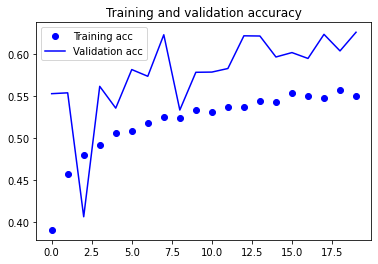

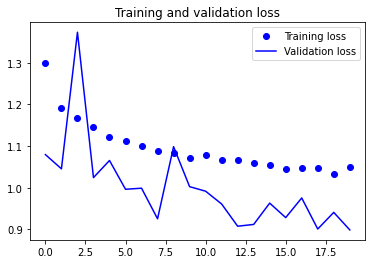

In [17]:
# # 학습한 결과 시각화 
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()